# 0. Import packages

In [ ]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 1. Load Base Dataset

In [ ]:
INPUT_DIR='/content'
OUTPUT_DIR='C:/Users/fast3/Desktop/challenge/IE343-Kaggle-Project/output'

In [ ]:
## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'

# 2. Load additional dataset
- Explain here the additional dataset that you used.
- If you do not use any additional dataset, it's ok and keep empty the below cell.

# 3. EDA and Preprocessing
- Conduct exploratory data analysis and explain the insights from your analyses.
- Conduct data preprocessing, including feature engineering, and explain your insights that derive such techniques.

In [ ]:
train['age'] = train['transaction_year']-train['built_year']
test['age'] = test['transaction_year']-test['built_year']

:built year 보단 거래 시점에 지은지 몇년 됐는지가 중요한 것 같아서 age로 바꿔주었다

In [ ]:

train["transaction_month1"] = train["transaction_month"].astype(str)
test["transaction_month1"] = test["transaction_month"].astype(str)
traindata=[]
for data in train["transaction_month1"]:
  if len(data) == 1:
    temp = "0" + data
  else:
    temp = data
  traindata.append(temp)
train["transaction_month1"] = traindata

testdata=[]
for data in test["transaction_month1"]:
  if len(data) == 1:
    temp = "0" + data
  else:
    temp = data
  testdata.append(temp)
test["transaction_month1"] = testdata
    

train["transaction_year1"] = train["transaction_year"].astype(str)
test["transaction_year1"] = test["transaction_year"].astype(str)

train["transaction_year_month"] = train.transaction_year1.str.cat(train.transaction_month1)
test["transaction_year_month"] = test.transaction_year1.str.cat(test.transaction_month1)

train["transaction_year_month"]=train["transaction_year_month"].astype(int)
test["transaction_year_month"] = test["transaction_year_month"].astype(int)

train = train.drop(['transaction_month1', 'transaction_year1'],axis=1)
test = test.drop(['transaction_month1', 'transaction_year1'],axis=1)

거래 연, 월, 일을 합쳐서 하나의 변수로 만들어주었다.

In [ ]:
# park.drop_duplicates(inplace=True)
# dcc.drop_duplicates(inplace=True)
# print(park.shape)
# print(dcc.shape)

park, dcc 데이터를 살펴보았을 때, 모든 정보가 똑같은 중복된 행들이 보여서, 이를 지워주려고 했다.

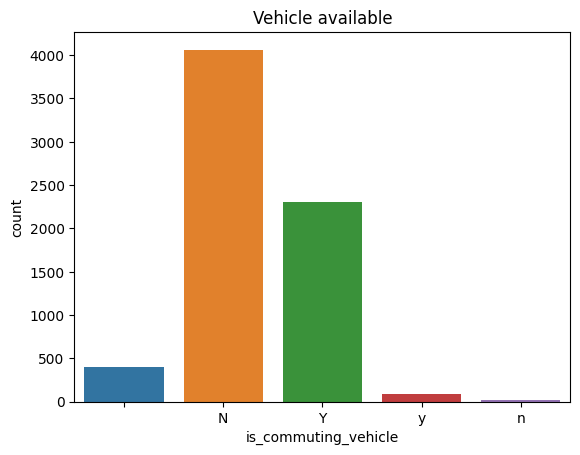

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_commuting_vehicle', data=dcc)
plt.title('Vehicle available')
plt.show()

In [ ]:
park_names = park['park_type'].unique().tolist()
park_names.remove('children park')
park_names.remove('neighborhood park')
park_names.remove('minipark')

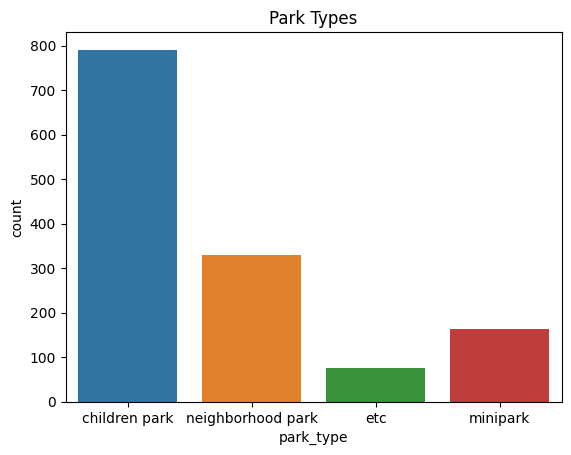

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

park=park.replace(park_names, "etc")

sns.countplot(x='park_type', data=park)
plt.title('Park Types')
plt.show()

children park, neighborhood park, minipark를 제외하고는 수가 많지 않아서 하나로 묶어서 생각할 예정이다.

In [ ]:
park_val=[]
dict={}

for i in range(len(train)):
  dong = train['dong'].iloc[i]
  if dong in park['dong']:
    if str(dong) in dict:
      park_val.append(dict[str(dong)])
      continue
    else:
      temp = park.loc[(park['dong'] == dong)&(park['city']==train['city'].iloc[i])&(park['park_area']>100)]
      if len(temp)>0:
        temp2 = temp.loc[temp['park_area'].idxmax()]
        if 'children park' in temp2['park_type']:
          count=4
          park_val.append(count)
        elif 'neighborhood park' in temp2['park_type']:
          count=3
          park_val.append(count)
        elif 'minipark' in temp2['park_type']:
          count=2
          park_val.append(count)
        else:
          count=1
          park_val.append(count)
      else:
        count=0
        park_val.append(count)
      dict[str(dong)] = count
train['park'] = park_val

In [ ]:
train.describe()

,index,apartment_id,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,PRICE,age,transaction_year_month,park
count,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329601.000000,329601.000000,329690.000000,329690.000000,3.296900e+05,329690.000000,329690.000000,329690.000000
mean,164844.500000,2200.879177,113.374546,93.811417,1998.201474,9.649725,36.511732,127.899152,2020.380928,6.546344,4.236468e+05,22.179453,202044.639097,1.911217
std,95173.449462,1301.361025,67.664274,35.312279,9.099311,6.893568,1.180404,1.026130,1.308745,3.313855,3.276236e+05,9.156246,130.807659,1.322713
min,0.000000,0.000000,0.000000,14.399720,1962.000000,-4.000000,35.058236,126.793126,2018.000000,1.000000,8.501200e+03,6.000000,201801.000000,0.000000
25%,82422.250000,1057.000000,56.000000,71.436483,1992.000000,4.000000,35.183442,127.012403,2019.000000,4.000000,2.185348e+05,15.000000,201911.000000,0.000000
50%,164844.500000,2188.000000,109.000000,99.697726,1999.000000,8.000000,37.486824,127.115032,2021.000000,7.000000,3.385540e+05,22.000000,202101.000000,3.000000
75%,247266.750000,3347.000000,171.000000,101.625662,2005.000000,13.000000,37.543500,129.065366,2021.000000,9.000000,5.185828e+05,28.000000,202112.000000,3.000000
max,329689.000000,4419.000000,236.000000,325.105962,2016.000000,70.000000,37.667270,129.202169,2022.000000,12.000000,7.073560e+06,60.000000,202212.000000,4.000000


In [ ]:
park_val=[]
dict={}
for i in range(len(test)):
  dong = test['dong'].iloc[i]
  if dong in park['dong']:
    if str(dong) in dict:
      park_val.append(dict[str(dong)])
      continue
    else:
      temp = park.loc[(park['dong'] == dong)&(park['city']==test['city'].iloc[i])&(park['park_area']>100)]
      if len(temp)>0:
        temp2 = temp.loc[temp['park_area'].idxmax()]
        if 'children park' in temp2['park_type']:
          count=4
          park_val.append(count)
        elif 'neighborhood park' in temp2['park_type']:
          count=3
          park_val.append(count)
        elif 'minipark' in temp2['park_type']:
          count=2
          park_val.append(count)
        else:
          count=1
          park_val.append(count)
      else:
        count=0
        park_val.append(count)
      dict[str(dong)] = count
test['park'] = park_val

In [ ]:
test.describe()

,index,apartment_id,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,age,transaction_year_month,park
count,85097.000000,85097.000000,85097.000000,85097.000000,85097.000000,85097.000000,85084.000000,85084.000000,85097.0,85097.000000,85097.000000,85097.000000,85097.000000
mean,372238.000000,2202.428770,111.969118,94.121187,1998.371564,9.646333,36.806906,127.644061,2023.0,5.889362,24.628436,202305.889362,1.873897
std,24565.532266,1301.522752,66.376688,34.614712,9.633915,6.725972,1.101825,0.952352,0.0,2.746825,9.633915,2.746825,1.332522
min,329690.000000,0.000000,0.000000,14.399720,1962.000000,-3.000000,35.058236,126.793126,2023.0,1.000000,7.000000,202301.000000,0.000000
25%,350964.000000,1056.000000,57.000000,71.466382,1992.000000,4.000000,35.211669,126.963208,2023.0,4.000000,17.000000,202304.000000,0.000000
50%,372238.000000,2221.000000,109.000000,100.642559,1999.000000,9.000000,37.498920,127.076780,2023.0,6.000000,24.000000,202306.000000,3.000000
75%,393512.000000,3341.000000,170.000000,101.634393,2006.000000,13.000000,37.557356,129.005640,2023.0,8.000000,31.000000,202308.000000,3.000000
max,414786.000000,4419.000000,236.000000,316.100157,2016.000000,70.000000,37.667270,129.202169,2023.0,11.000000,61.000000,202311.000000,4.000000


In [ ]:
park.describe()

,gu,dong,park_area,park_open_year
count,1359.000000,1359.000000,1359.000000,937.000000
mean,15.953642,112.149375,104.042110,1990.151547
std,10.658927,67.431843,219.255942,17.656216
min,0.000000,0.000000,4.690416,1938.000000
25%,5.000000,57.000000,32.407417,1977.000000
50%,17.000000,106.000000,40.987803,1992.000000
75%,24.000000,170.500000,81.299446,2006.000000
max,35.000000,236.000000,2587.043680,2018.000000


같은 동(이면 같은 시일 것이므로) 안에 park가 존재하고, 어느 정도 넓은(평균 이상으로 잡았다) park가 있을 때 그 park의 종류에 따라 가중치를 부여했다.


In [ ]:
dcc=dcc.replace(to_replace=np.nan,value=0)
dcc=dcc.replace(to_replace="n",value="N")
dcc=dcc.replace(to_replace="y",value="Y")
dcc=dcc.replace({'is_commuting_vehicle': {" ": "N", 0: "N"}})
dcc=dcc.replace({'is_commuting_vehicle': {"N": 0, "Y": 1}})

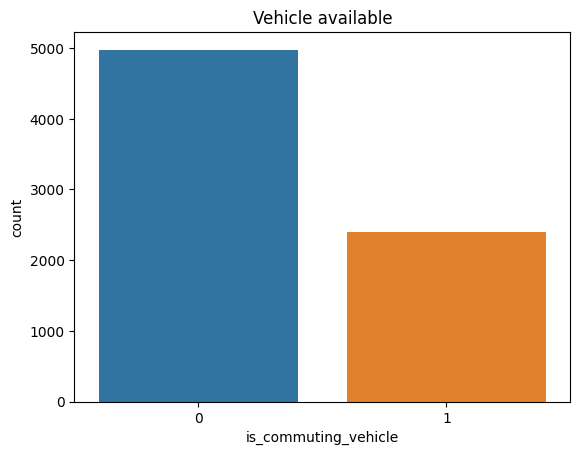

In [ ]:
sns.countplot(x='is_commuting_vehicle', data=dcc)
plt.title('Vehicle available')
plt.show()

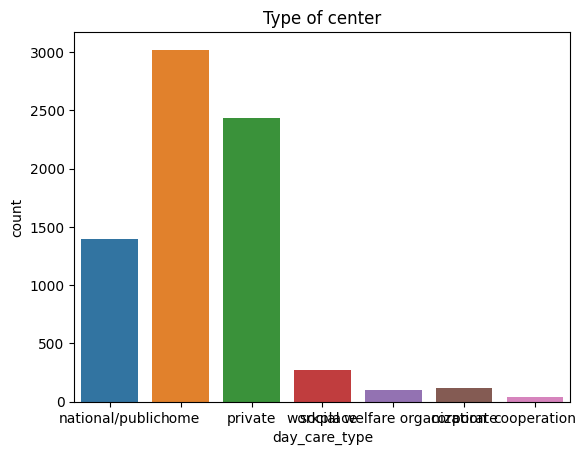

In [ ]:
sns.countplot(x='day_care_type', data=dcc)
plt.title('Type of center')
plt.show()

In [ ]:
dcc.describe()

,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000
mean,14.987386,44.425607,8.748813,2.558660,0.184321,4.645599,0.324698
std,10.899804,36.994024,5.949266,2.726149,0.534043,4.880545,0.468294
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,29.000000,7.000000,3.000000,0.000000,4.000000,0.000000
75%,24.000000,60.000000,11.000000,4.000000,0.000000,6.000000,1.000000
max,35.000000,489.000000,98.000000,22.000000,16.000000,53.000000,1.000000


In [ ]:
gu_name=[]
dict={}
for i in range(len(train)):
  dong = train['dong'].iloc[i]
  if str(dong) in dict:
    gu_name.append(dict[str(dong)])
    continue
  else:
    temp = park[(park['dong']==dong)&(park['city']==train['city'].iloc[i])]
    gu = temp['gu'].iloc[0]
    gu_name.append(gu)
    dict[str(dong)]=gu

train['gu'] = gu_name

In [ ]:
gu_name=[]
dict={}
for i in range(len(test)):
  dong = test['dong'].iloc[i]
  if str(dong) in dict:
    gu_name.append(dict[str(dong)])
    continue
  else:
    temp = park[(park['dong']==dong)&(park['city']==test['city'].iloc[i])]
    gu = temp['gu'].iloc[0]
    gu_name.append(gu)
    dict[str(dong)]=gu
test['gu'] = gu_name

In [ ]:
# vehicle=[]
# for gu in train['gu']:
#   if gu in dcc['gu']:
#     temp = dcc.loc[(dcc['gu']==gu)&(dcc['playground_num']>0)&(dcc['is_commuting_vehicle']==1)]
#     if len(temp)>0:
#       count=1
#     else:
#       count=0
#   else:
#     count=0
#   vehicle.append(count)
# train['dcc_vehicle'] = vehicle


In [ ]:
# vehicle=[]
# for gu in test['gu']:
#   if gu in dcc['gu']:
#     temp = dcc.loc[(dcc['gu']==gu)&(dcc['playground_num']>0)&(dcc['is_commuting_vehicle']==1)]
#     if len(temp)>0:
#       count=1
#     else:
#       count=0
#   else:
#     count=0
#   vehicle.append(count)
# test['dcc_vehicle'] = vehicle

In [ ]:
babyteacherratio=[]
dict={}
for i in range(len(train)):
  city = train['city'].iloc[i]
  gu = train['gu'].iloc[i]
  if gu in dcc['gu']:
    if str(gu) in dict:
      babyteacherratio.append(dict[str(gu)])
      continue
    else:
      temp = dcc[(dcc['gu']==gu)&(dcc['is_commuting_vehicle']==1)&(dcc['city']==city)&(dcc['playground_num']>0)]
      if len(temp)==0:
        count=0
        dict[str(gu)]=count
      else:
        templist=[]
        for j in range(len(temp)):
          if temp['teacher_num'].iloc[j] == 0:
            continue
          else:
            templist.append(temp['day_care_baby_num'].iloc[j]/temp['teacher_num'].iloc[j])
            count = min(templist)
        dict[str(gu)]=count                            
  else:
    count=0
    dict[str(gu)]=count
  babyteacherratio.append(count)
train['dcc_ratio'] = babyteacherratio

In [ ]:
train.describe()

,index,apartment_id,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,PRICE,age,transaction_year_month,park,gu,dcc_ratio
count,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329601.000000,329601.000000,329690.000000,329690.000000,3.296900e+05,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000
mean,164844.500000,2200.879177,113.374546,93.811417,1998.201474,9.649725,36.511732,127.899152,2020.380928,6.546344,4.236468e+05,22.179453,202044.639097,1.911217,16.306728,1.701582
std,95173.449462,1301.361025,67.664274,35.312279,9.099311,6.893568,1.180404,1.026130,1.308745,3.313855,3.276236e+05,9.156246,130.807659,1.322713,10.550087,1.931213
min,0.000000,0.000000,0.000000,14.399720,1962.000000,-4.000000,35.058236,126.793126,2018.000000,1.000000,8.501200e+03,6.000000,201801.000000,0.000000,0.000000,0.000000
25%,82422.250000,1057.000000,56.000000,71.436483,1992.000000,4.000000,35.183442,127.012403,2019.000000,4.000000,2.185348e+05,15.000000,201911.000000,0.000000,7.000000,0.000000
50%,164844.500000,2188.000000,109.000000,99.697726,1999.000000,8.000000,37.486824,127.115032,2021.000000,7.000000,3.385540e+05,22.000000,202101.000000,3.000000,16.000000,0.000000
75%,247266.750000,3347.000000,171.000000,101.625662,2005.000000,13.000000,37.543500,129.065366,2021.000000,9.000000,5.185828e+05,28.000000,202112.000000,3.000000,24.000000,3.888889
max,329689.000000,4419.000000,236.000000,325.105962,2016.000000,70.000000,37.667270,129.202169,2022.000000,12.000000,7.073560e+06,60.000000,202212.000000,4.000000,35.000000,5.954545


In [ ]:
babyteacherratio=[]
dict={}
for i in range(len(test)):
  city = test['city'].iloc[i]
  gu = test['gu'].iloc[i]
  if gu in dcc['gu']:
    if str(gu) in dict:
      babyteacherratio.append(dict[str(gu)])
      continue
    else:
      temp = dcc[(dcc['gu']==gu)&(dcc['is_commuting_vehicle']==1)&(dcc['city']==city)&(dcc['playground_num']>0)]
      if len(temp)==0:
        count=0
        dict[str(gu)]=count
      else:
        templist=[]
        for j in range(len(temp)):
          if temp['teacher_num'].iloc[j] == 0:
            continue
          else:
            templist.append(temp['day_care_baby_num'].iloc[j]/temp['teacher_num'].iloc[j])
            count = min(templist)
        dict[str(gu)]=count                            
  else:
    count=0
    dict[str(gu)]=count
  babyteacherratio.append(count)
test['dcc_ratio'] = babyteacherratio

day care center가 gu단위로 나와있기 때문에 거주 지역에서 어느 정도 거리인지 예측하기 힘들다.(만약 dong으로 나와있었으면 그냥 했을듯), 그래서 차로 등원할 수 있고, playground가 존재하는 것을 최소 기준으로 잡았다. 그 중에서도 다른 환경 조건이 없으므로 한 선생님당 담당하는 아기의 수를 새로운 평가 조건으로 만들고, (아기 한명당 붙을 수 있는 선생님의 수)그 중에서 가장 작은 ratio를 그 apart의 평가 요소로 추가하였다.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_cols = list(train.select_dtypes('object'))

for col in le_cols:
    le.fit(train[col])
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
train.describe()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE,age,transaction_year_month,park,gu,dcc_ratio
count,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329601.000000,329601.000000,329690.000000,329690.000000,329690.000000,3.296900e+05,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000
mean,164844.500000,2200.879177,0.564175,113.374546,93.811417,1998.201474,9.649725,36.511732,127.899152,2020.380928,6.546344,1.852331,4.236468e+05,22.179453,202044.639097,1.911217,16.306728,1.701582
std,95173.449462,1301.361025,0.495865,67.664274,35.312279,9.099311,6.893568,1.180404,1.026130,1.308745,3.313855,1.986175,3.276236e+05,9.156246,130.807659,1.322713,10.550087,1.931213
min,0.000000,0.000000,0.000000,0.000000,14.399720,1962.000000,-4.000000,35.058236,126.793126,2018.000000,1.000000,0.000000,8.501200e+03,6.000000,201801.000000,0.000000,0.000000,0.000000
25%,82422.250000,1057.000000,0.000000,56.000000,71.436483,1992.000000,4.000000,35.183442,127.012403,2019.000000,4.000000,0.000000,2.185348e+05,15.000000,201911.000000,0.000000,7.000000,0.000000
50%,164844.500000,2188.000000,1.000000,109.000000,99.697726,1999.000000,8.000000,37.486824,127.115032,2021.000000,7.000000,1.000000,3.385540e+05,22.000000,202101.000000,3.000000,16.000000,0.000000
75%,247266.750000,3347.000000,1.000000,171.000000,101.625662,2005.000000,13.000000,37.543500,129.065366,2021.000000,9.000000,4.000000,5.185828e+05,28.000000,202112.000000,3.000000,24.000000,3.888889
max,329689.000000,4419.000000,1.000000,236.000000,325.105962,2016.000000,70.000000,37.667270,129.202169,2022.000000,12.000000,5.000000,7.073560e+06,60.000000,202212.000000,4.000000,35.000000,5.954545


In [ ]:
train_busan = train[train['city']==1]
train_seoul = train[train['city']==0]
test_busan = test[test['city']==1]
test_seoul = test[test['city']==0]

# 4. Modeling

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold

train_cols = ['apartment_id', 'gu', 'dong', 'house_area', 'built_year', 'floor', 'lat','long', 'transaction_year_month', 'park','dcc_ratio']
kf = KFold(n_splits=5,shuffle=True,random_state=2023)
y_pred_seoul = np.zeros(len(test_seoul))
# hyper_params = {
#         "objective" : "regression", 'n_estimators':15000, 'early_stopping_rounds':133,
#                   "learning_rate" : 0.1, 
#                   "bagging_freq" : 5,
#                   "bagging_fraction" : 0.8,
#                   "bagging_seed" : 0,'min_data_in_leaf': 1144, 
#                     # 'max_depth': 7
#     }

for tr_idx, val_idx in kf.split(train_seoul):      
    X_train = train_seoul[train_cols].iloc[tr_idx, :]
    y_train = train_seoul['PRICE'].iloc[tr_idx]

    X_val = train_seoul[train_cols].iloc[val_idx, :]
    y_val = train_seoul['PRICE'].iloc[val_idx]
    xgbm = XGBRegressor(n_jobs=-1, n_estimators = 3000, learning_rate= 0.2,gamma=1,reg_lambda=1,max_depth=6) # 
    xgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds= 100, verbose=100)
    y_pred_seoul += xgbm.predict(test_seoul[train_cols])/5 #n_splits, 모든 결과를 평균내서 y_pred에 들어감


[0]	validation_0-mae:212709.15471
[100]	validation_0-mae:20872.26308
[200]	validation_0-mae:17224.75836
[300]	validation_0-mae:15693.46436
[400]	validation_0-mae:14727.44097
[500]	validation_0-mae:14094.21851
[600]	validation_0-mae:13667.22209
[700]	validation_0-mae:13374.24157
[800]	validation_0-mae:13163.04112
[900]	validation_0-mae:12958.48042
[1000]	validation_0-mae:12861.24785
[1100]	validation_0-mae:12755.07829
[1200]	validation_0-mae:12676.42902
[1300]	validation_0-mae:12617.28856
[1400]	validation_0-mae:12574.59969
[1500]	validation_0-mae:12537.77258
[1600]	validation_0-mae:12523.87786
[1700]	validation_0-mae:12477.14748
[1800]	validation_0-mae:12453.01253
[1900]	validation_0-mae:12435.77242
[2000]	validation_0-mae:12426.18434
[2100]	validation_0-mae:12419.01516
[2200]	validation_0-mae:12406.39481
[2300]	validation_0-mae:12399.26070
[2400]	validation_0-mae:12392.94690
[2500]	validation_0-mae:12392.18809
[2600]	validation_0-mae:12389.01762
[2700]	validation_0-mae:12380.57395
[28

In [ ]:
xgb.plot_importance(xgbm, height=.5)

In [ ]:
y_pred_busan = np.zeros(len(test_busan))
# hyper_params = {
#         "objective" : "regression", 'n_estimators':15000, 'early_stopping_rounds':133,
#                   "learning_rate" : 0.1, 
#                   "bagging_freq" : 5,
#                   "bagging_fraction" : 0.8,
#                   "bagging_seed" : 0,'min_data_in_leaf': 1144, 
#                     # 'max_depth': 7
#     }

for tr_idx, val_idx in kf.split(train_busan):      
    X_train = train_busan[train_cols].iloc[tr_idx, :]
    y_train = train_busan['PRICE'].iloc[tr_idx]

    X_val = train_busan[train_cols].iloc[val_idx, :]
    y_val = train_busan['PRICE'].iloc[val_idx]
    xgbm = XGBRegressor(n_jobs=-1, n_estimators = 3000, learning_rate= 0.2,gamma=1,reg_lambda=1,max_depth=6) # 
    xgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds= 100, verbose=100)
    y_pred_busan += xgbm.predict(test_busan[train_cols])/5 #n_splits, 모든 결과를 평균내서 y_pred에 들어감

[0]	validation_0-mae:436502.88499
[100]	validation_0-mae:39818.16464
[200]	validation_0-mae:31691.47547
[300]	validation_0-mae:28059.17500
[400]	validation_0-mae:25925.43903
[500]	validation_0-mae:24511.60485
[600]	validation_0-mae:23376.62983
[700]	validation_0-mae:22609.27901
[800]	validation_0-mae:22154.88957
[900]	validation_0-mae:21695.47325
[1000]	validation_0-mae:21386.04493
[1100]	validation_0-mae:21117.49846
[1200]	validation_0-mae:20864.94947
[1300]	validation_0-mae:20674.44026
[1400]	validation_0-mae:20524.42595
[1500]	validation_0-mae:20414.60763
[1600]	validation_0-mae:20338.49814
[1700]	validation_0-mae:20237.35449
[1800]	validation_0-mae:20162.50405
[1900]	validation_0-mae:20088.96527
[2000]	validation_0-mae:20004.57678
[2100]	validation_0-mae:19966.97694
[2200]	validation_0-mae:19911.93539
[2300]	validation_0-mae:19878.42477
[2400]	validation_0-mae:19839.97845
[2500]	validation_0-mae:19805.76886
[2600]	validation_0-mae:19770.61751
[2700]	validation_0-mae:19739.39246
[28

여러 regressor model을 테스트 해본 결과, XGBregressor가 시간은 오래 걸리지만 가장 적합한 결과가 나왔다.
그리고 city별로 나눠서 modeling을 돌려 city별 집값 차이가 생기는 점을 고려하였다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

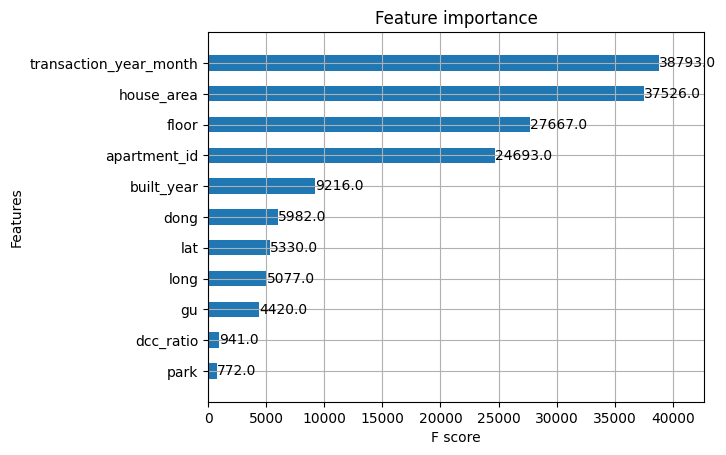

In [ ]:
xgb.plot_importance(xgbm, height=.5)

# 5. Make submission

In [ ]:
seoul = pd.DataFrame({'index':test_seoul['index'].values, 'PRICE':y_pred_seoul})
busan = pd.DataFrame({'index':test_busan['index'].values, 'PRICE':y_pred_busan})
pd.concat([seoul,busan]).sort_values('index').to_csv(os.path.join(INPUT_DIR, 'answer.csv'), index=False)
# pd.DataFrame({'index':test['index'].values, 'PRICE':y_pred}).to_csv(os.path.join(OUTPUT_DIR, 'answer.csv'), index=False)